# Import necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_generator = ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.3
)

In [5]:
root_dir = r"C:\Users\nikun\Downloads\LP-IV-datasets\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img"


img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=True,
    subset="training"
)

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


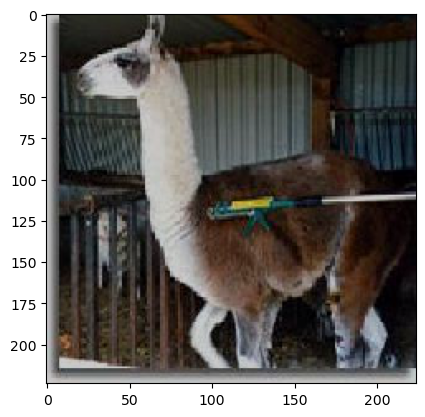

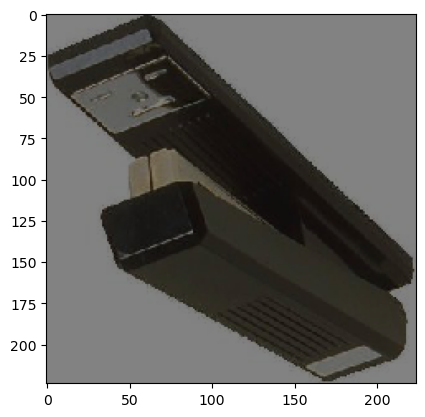

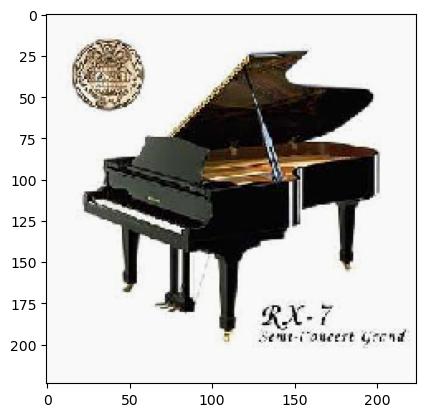

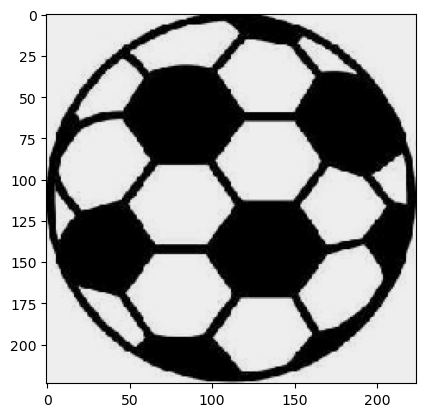

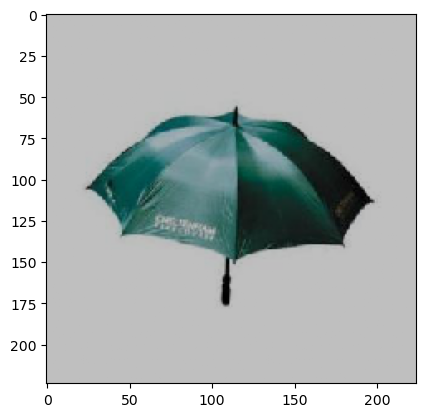

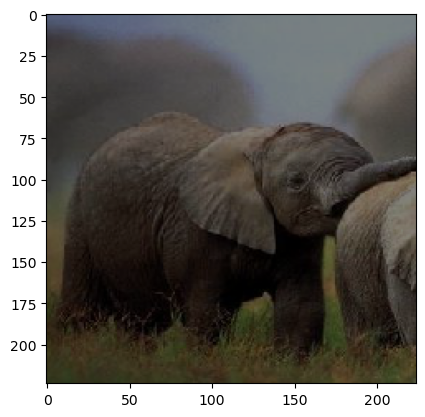

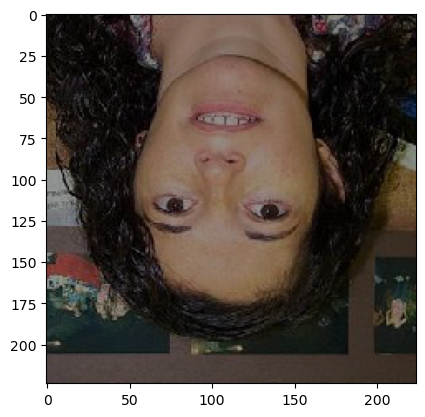

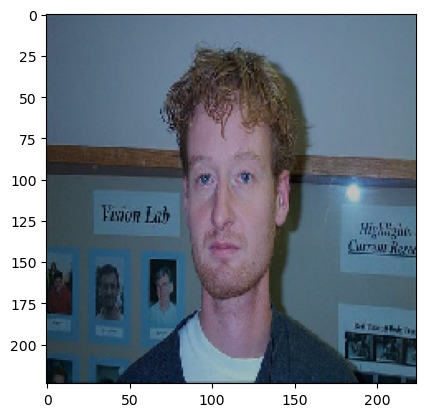

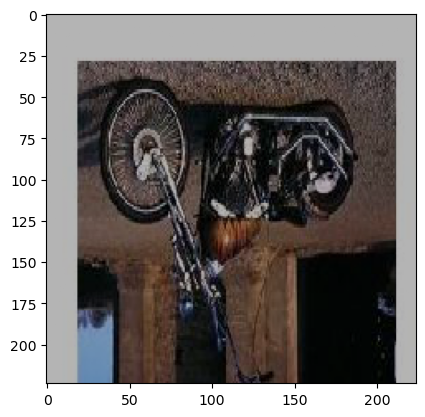

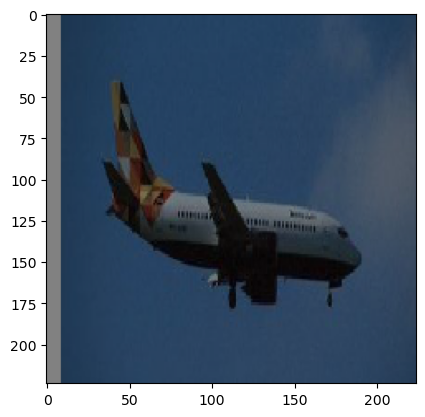

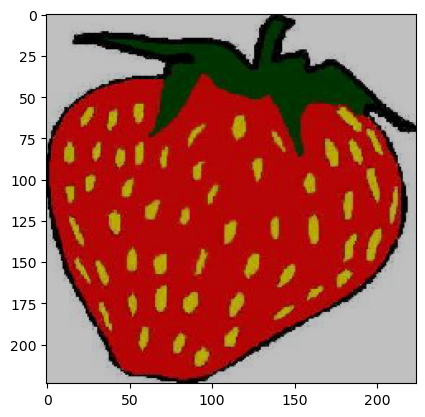

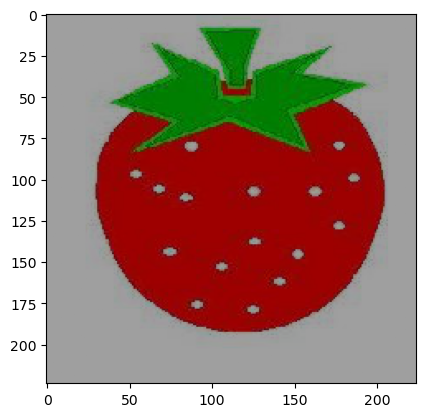

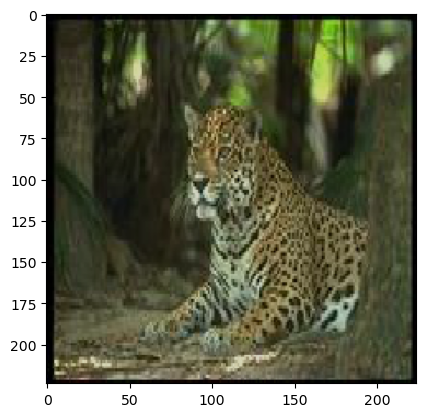

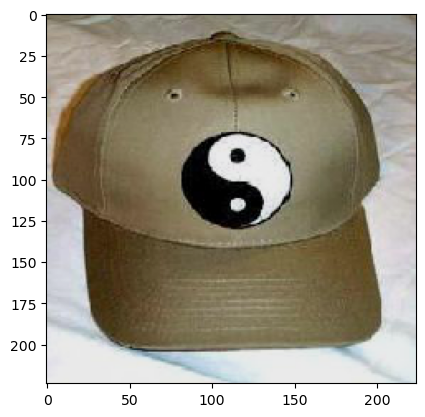

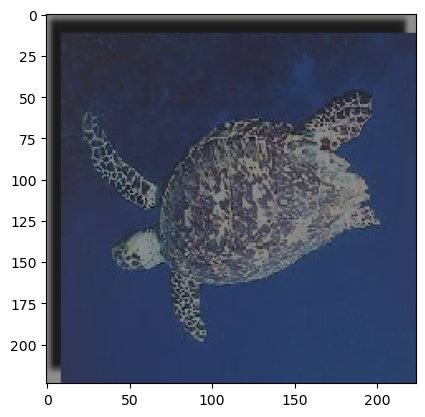

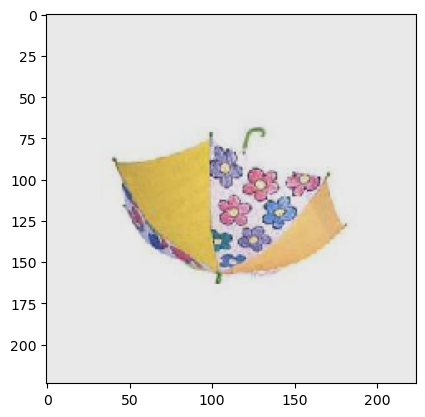

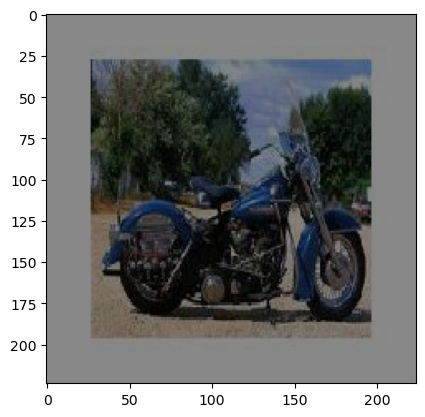

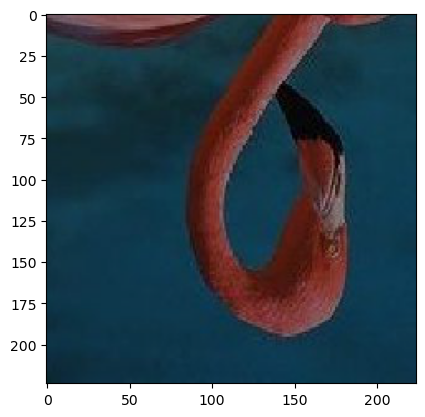

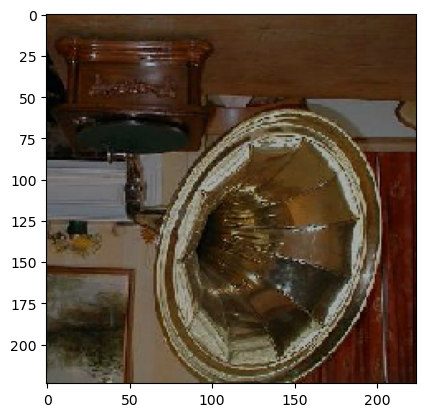

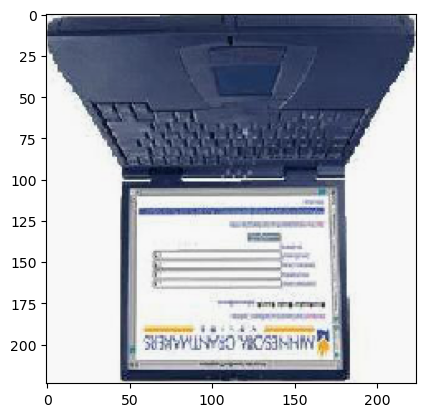

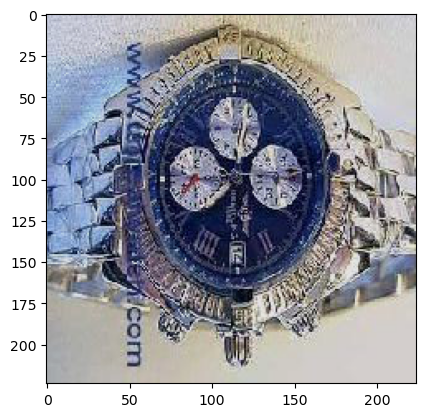

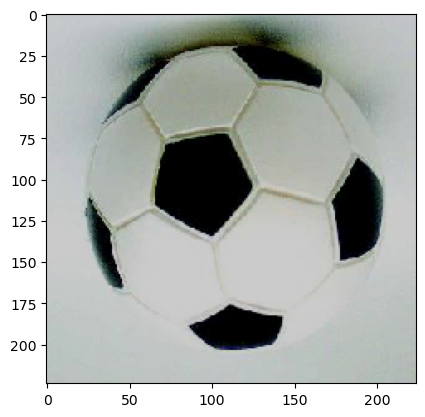

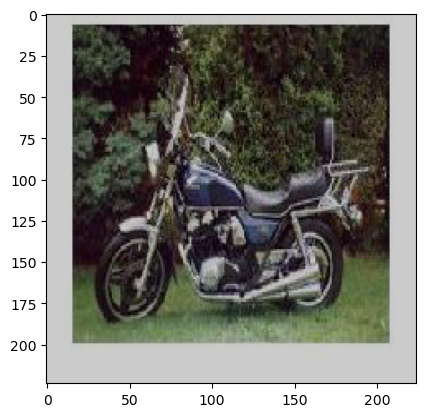

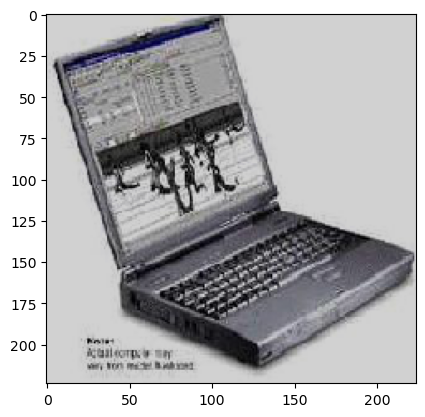

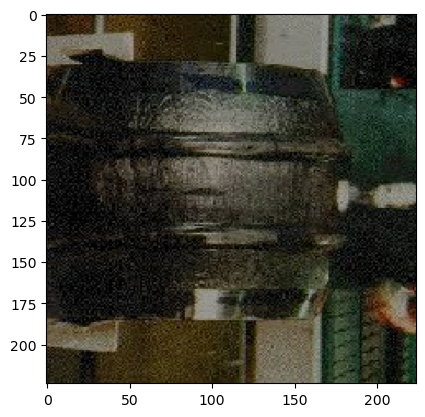

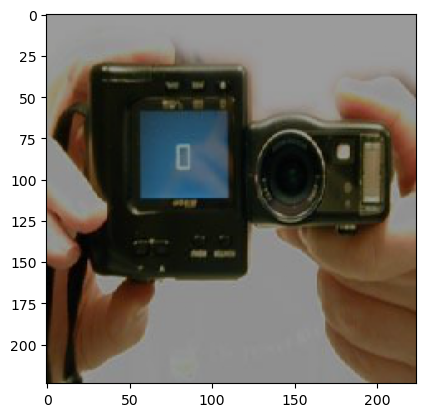

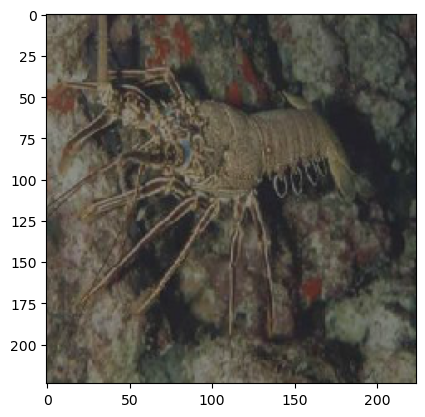

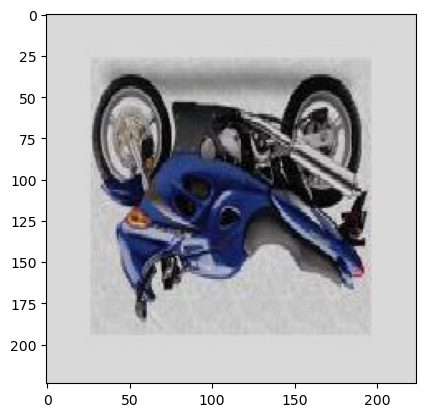

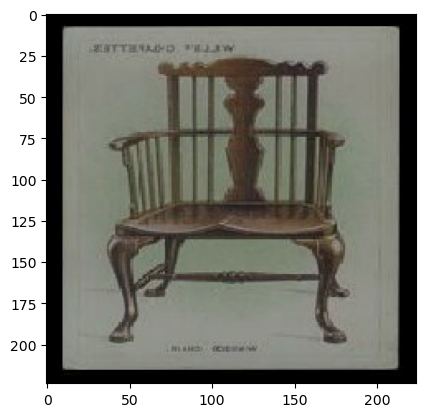

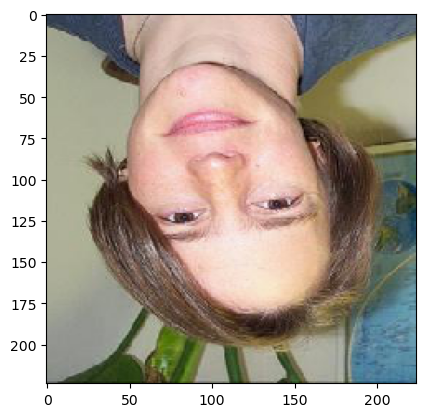

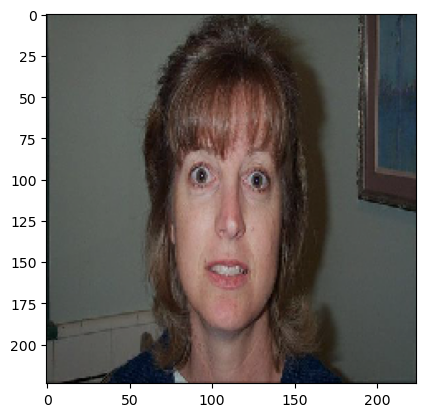

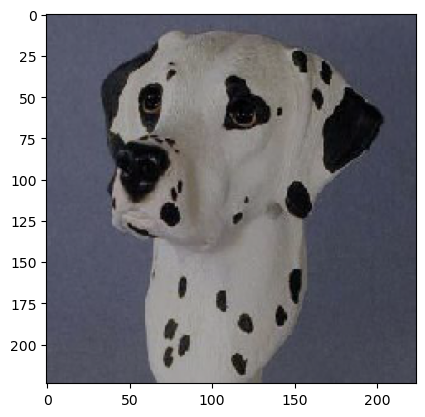

In [7]:
imgs, labels = next (iter(img_generator_flow_train))
for img, labels in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

# a. Loading pre-trained model

In [9]:
model_path = r"C:\Users\nikun\Downloads\LP-IV-datasets\LP-IV-datasets\Object Detection(Ass6)\model_weights.h5"

base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

# b. Freeze parameters

In [12]:
base_model.trainable = False

# c. Add custom classifier with several layers of trainable parameteres to model

In [15]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 102)                 │         470,118 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,184,806 (57.93 MB)

 Trainable params: 470,118 (1.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# d. Train classifier layers on training data available for task

In [20]:
adam = Adam(0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5,
          epochs = 5)

C:\Users\nikun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 254s 62s/step - accuracy: 0.0648 - loss: 4.9202 - val_accuracy: 0.1496 - val_loss: 5.0673
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 257s 64s/step - accuracy: 0.1388 - loss: 5.2496 - val_accuracy: 0.2311 - val_loss: 4.5373
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 265s 66s/step - accuracy: 0.3109 - loss: 4.1416 - val_accuracy: 0.3004 - val_loss: 3.9594
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 256s 63s/step - accuracy: 0.3560 - loss: 3.5661 - val_accuracy: 0.3159 - val_loss: 3.5499
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 258s 64s/step - accuracy: 0.2889 - loss: 3.7918 - val_accuracy: 0.4107 - val_loss: 3.1271


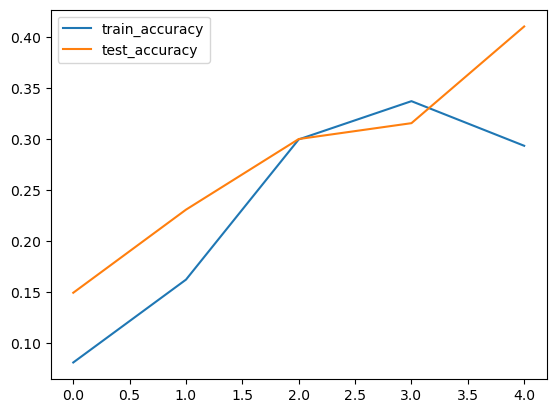

In [24]:
plt.plot(model.history.history['accuracy'], label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()

# Fine-tune hyper parameters and unfreeze more layers

In [27]:
base_model.trainable = True

model.compile(loss='categorical_crossentropy',metrics=['categorical_accuracy'],optimizer='adam')

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=5, 
          epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 315s 75s/step - categorical_accuracy: 0.1707 - loss: 234.5585 - val_categorical_accuracy: 0.0089 - val_loss: 4.7355
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 317s 76s/step - categorical_accuracy: 0.0196 - loss: 5.4991 - val_categorical_accuracy: 0.0544 - val_loss: 8.7842
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 331s 80s/step - categorical_accuracy: 0.0000e+00 - loss: 7.1389 - val_categorical_accuracy: 0.0144 - val_loss: 4.6232
Epoch 4/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - categorical_accuracy: 0.0286 - loss: 7.6040